# <center> AMAZON SENTIMENT TIME SERIES ANALYSIS

---



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.api import adfuller
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.api import adfuller
from sklearn.metrics import mean_squared_error #for calculating errors.
import random

## <center> Musical Instruments

In [4]:
music=pd.read_csv("/content/drive/MyDrive/Final_Music_EDA_Tableau.csv",parse_dates=['date'])

In [5]:
music.isnull().sum()

Unnamed: 0          0
asin                0
title               0
price               0
brand            3814
description     61659
subcategory         0
reviewerID          0
review            291
ratings             0
summary           453
date                0
polarity            0
sentiment           0
helpful_rate        0
dtype: int64

In [6]:
#dropping null values
music.dropna(inplace=True)

In [7]:
#checking the number of records and features in music dataset
music.shape

(232417, 15)

In [9]:
music.isnull().sum()

Unnamed: 0      0
asin            0
title           0
price           0
brand           0
description     0
subcategory     0
reviewerID      0
review          0
ratings         0
summary         0
date            0
polarity        0
sentiment       0
helpful_rate    0
dtype: int64

In [10]:
music

,Unnamed: 0,asin,title,price,brand,description,subcategory,reviewerID,review,ratings,summary,date,polarity,sentiment,helpful_rate
1,24,0634061801,50 Licks Blues Style - DVD,12.49,Hal Leonard,Unlock the secrets of blues guitar! Ace sessio...,TV,A1D1S69ZMKYCCV,great book you should be aware of blues scales...,5.0,product review,2010-11-06,0.277083,Positive,0.000
2,25,0634061801,50 Licks Blues Style - DVD,12.49,Hal Leonard,Unlock the secrets of blues guitar! Ace sessio...,TV,A7R79JLQ5Q28M,while i did not enjoy mats blues rock guitar s...,4.0,good collection of blues licks,2005-08-25,0.170486,Positive,0.000
3,26,0634061801,50 Licks Blues Style - DVD,12.49,Hal Leonard,Unlock the secrets of blues guitar! Ace sessio...,TV,A3T7SXCKJUYXT3,this was a very pleasant suprize i really enjo...,5.0,buy it and get out of a rut,2007-09-27,0.359313,Positive,1.000
4,27,0634061801,50 Licks Blues Style - DVD,12.49,Hal Leonard,Unlock the secrets of blues guitar! Ace sessio...,TV,A1JZM0YIYHL6JW,ive been playing the blues for a long time so ...,4.0,well executed and professionally done,2010-04-08,0.374242,Positive,1.000
5,28,0634061801,50 Licks Blues Style - DVD,12.49,Hal Leonard,Unlock the secrets of blues guitar! Ace sessio...,TV,A372SXZ39TUWTZ,mat and would not hit it off instant personal...,5.0,finally a blues guitar dvd with some meat,2005-07-30,0.393519,Positive,0.933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296904,500139,B00KT2GN3W,NuoYa001 NEW 1X Blue 12 Holes Ocarina Ceramic ...,19.80,NuoYa,"Description:This is a high quality, kiln-fired...",Wind & Woodwind Instruments,A392RO69KX8QVT,my son loves this and carries it around the ho...,5.0,he loves it,2014-07-01,0.609141,Positive,0.000
296905,500154,B00KZHMKQA,Fender 023-4514-000 Electric Guitar Amplifier ...,64.99,Fender,"Expand the versatility of your rig, switch bet...",Amplifiers & Effects,A2RVKHYNRJ4GGQ,does ab fine if you want aby you can get it bu...,3.0,not what i thought but does the job,2014-07-19,0.186212,Positive,0.000
296906,500167,B00L75HFOQ,Guitar Hanger Hook Holder Wall Mount Display -...,10.50,TopStage,GUITAR HANGER - WALL DISPLAY Adjustable Width ...,Instrument Accessories,A1EITL4Y22NWC0,it is good for methank you,5.0,five stars,2014-07-17,0.700000,Positive,1.000
296907,500174,SMLRBIMX03,"LR Baggs iMix w/IBeam, Element, Preamp, Mixer,...",229.00,LR Baggs,The iMix from LR Baggs combines the IBeam and ...,Instrument Accessories,AIDHT6KXOL64T,it was a perfect retrofit for my guitar i love...,5.0,a great choice for my guitar,2012-12-18,0.633333,Positive,0.000


# Finding the most popular Subcategory in music dataset


### Seperating top 13 subcategories (with >1k reviews)

In [11]:
music.dtypes

Unnamed: 0               int64
asin                    object
title                   object
price                  float64
brand                   object
description             object
subcategory             object
reviewerID              object
review                  object
ratings                float64
summary                 object
date            datetime64[ns]
polarity               float64
sentiment               object
helpful_rate           float64
dtype: object

In [12]:
values=music['subcategory'].value_counts()
values

Instrument Accessories            109085
Live Sound & Stage                 19135
Microphones & Accessories          16354
Studio Recording Equipment         15826
Amplifiers & Effects               15220
Guitars                            11097
DJ, Electronic Music & Karaoke     10823
Drums & Percussion                 10320
Wind & Woodwind Instruments         6519
Band & Orchestra                    6332
Stringed Instruments                4907
Keyboards                           2059
Musical Instruments                 1905
Bass Guitars                        1014
Folk                                 748
TV                                   411
Movies                               339
Jazz                                 126
Children's Music                      59
Blues                                 41
Classic Rock                          26
Country                               18
Special Interest                      18
Classical                             17
Rock            

In [13]:
a=values[0:13]
b=a.index

In [22]:
new_data=(music[music.subcategory.isin(b) == True])
new_data

,Unnamed: 0,asin,title,price,brand,description,subcategory,reviewerID,review,ratings,summary,date,polarity,sentiment,helpful_rate
49,236,0739057561,Don Mock's Mastering the Dominant Chord,15.95,Alfred,Alfred Music Publishing is the worlds largest ...,Instrument Accessories,AGHWSGGOCSN9Z,i own a wall of guitar books and while i dont ...,5.0,don mocks books are the best,2013-05-14,0.121429,Positive,0.000
50,237,0739057561,Don Mock's Mastering the Dominant Chord,15.95,Alfred,Alfred Music Publishing is the worlds largest ...,Instrument Accessories,A134AXYVRM0E2M,don mock what else is there to say add it to y...,5.0,a book you need to own,2013-01-12,0.095833,Positive,0.500
51,238,0739057561,Don Mock's Mastering the Dominant Chord,15.95,Alfred,Alfred Music Publishing is the worlds largest ...,Instrument Accessories,A2S1Q1HYXCZX00,the book solved many of the problems that i ha...,5.0,wish i had this years ago,2012-01-05,0.833333,Positive,0.750
52,239,0739057561,Don Mock's Mastering the Dominant Chord,15.95,Alfred,Alfred Music Publishing is the worlds largest ...,Instrument Accessories,A2MQ6797SHS46Z,dont miss this opportunity in learning everyth...,5.0,a must have,2012-10-27,-0.100000,Negative,0.667
457,695,0786615303,Premium Clarke Tinwhistle-Key of C,10.99,Clarke Tinwhistle Co.,This &#34;original&#34; Clarke tinwhistle is a...,Wind & Woodwind Instruments,A1P7X0HFM1ISK7,the book and cd are for d so now i need to ord...,5.0,thought i ordered d but ended up with c,2013-01-14,0.500000,Positive,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296904,500139,B00KT2GN3W,NuoYa001 NEW 1X Blue 12 Holes Ocarina Ceramic ...,19.80,NuoYa,"Description:This is a high quality, kiln-fired...",Wind & Woodwind Instruments,A392RO69KX8QVT,my son loves this and carries it around the ho...,5.0,he loves it,2014-07-01,0.609141,Positive,0.000
296905,500154,B00KZHMKQA,Fender 023-4514-000 Electric Guitar Amplifier ...,64.99,Fender,"Expand the versatility of your rig, switch bet...",Amplifiers & Effects,A2RVKHYNRJ4GGQ,does ab fine if you want aby you can get it bu...,3.0,not what i thought but does the job,2014-07-19,0.186212,Positive,0.000
296906,500167,B00L75HFOQ,Guitar Hanger Hook Holder Wall Mount Display -...,10.50,TopStage,GUITAR HANGER - WALL DISPLAY Adjustable Width ...,Instrument Accessories,A1EITL4Y22NWC0,it is good for methank you,5.0,five stars,2014-07-17,0.700000,Positive,1.000
296907,500174,SMLRBIMX03,"LR Baggs iMix w/IBeam, Element, Preamp, Mixer,...",229.00,LR Baggs,The iMix from LR Baggs combines the IBeam and ...,Instrument Accessories,AIDHT6KXOL64T,it was a perfect retrofit for my guitar i love...,5.0,a great choice for my guitar,2012-12-18,0.633333,Positive,0.000


In [16]:
new_data['subcategory'].unique()

array(['Instrument Accessories', 'Wind & Woodwind Instruments',
       'Microphones & Accessories', 'Live Sound & Stage',
       'Studio Recording Equipment', 'Drums & Percussion',
       'Band & Orchestra', 'Guitars', 'Stringed Instruments',
       'DJ, Electronic Music & Karaoke', 'Musical Instruments',
       'Amplifiers & Effects', 'Keyboards'], dtype=object)

In [21]:
music_d=new_data.groupby('subcategory')['polarity'].mean()
music_d.sort_values(ascending=False)

subcategory
Stringed Instruments              0.302224
Drums & Percussion                0.293023
Guitars                           0.281572
Keyboards                         0.269785
Instrument Accessories            0.268247
Wind & Woodwind Instruments       0.268198
Amplifiers & Effects              0.259392
Band & Orchestra                  0.259013
DJ, Electronic Music & Karaoke    0.257925
Musical Instruments               0.251437
Live Sound & Stage                0.250361
Microphones & Accessories         0.247054
Studio Recording Equipment        0.239378
Name: polarity, dtype: float64

# Stringed Instruments is the most popular subcategory in music dataset.

In [23]:
music_ts=music['title'][music['subcategory']=='Stringed Instruments']
music_ts.value_counts()

Kala KA-15S Mahogany Soprano Ukulele                                  252
Johnson Mandolin A-Style with F Holes Sunburst                        212
Makala MK-S Soprano Ukulele                                           125
Makala Dolphin Bridge Red Burst Soprano Ukulele                       121
Rogue RM-100A A-Style Mandolin Black                                  120
                                                                     ... 
Sitar Main Bridge, Pre-Cut 7 Grooves                                    1
Eddy Finn Minnow EF-MN-BK Ukulele, Matching Black Gig Bag Included      1
Eddy Finn Minnow EF-MN-RD Ukulele, Matching Red Gig Bag Included        1
Eddy Finn EF-BU1 Banjo Ukulele                                          1
Oscar Schmidt OUUM200K Tenor Ukulele, Gloss Finish                      1
Name: title, Length: 620, dtype: int64

# The product in stringed instruments with the most reviews:
## Kala KA-15S Mahogany Soprano Ukulele 

In [24]:
# Seperating records associated with Kala KA-15S Mahogany Soprano Ukulele 
music_data=music[['date','polarity']][music['title']=='Kala KA-15S Mahogany Soprano Ukulele'][music['subcategory']=='Stringed Instruments']
music_data

<ipython-input-24-d7cc65fb79f7>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  music_data=music[['date','polarity']][music['title']=='Kala KA-15S Mahogany Soprano Ukulele'][music['subcategory']=='Stringed Instruments']


,date,polarity
162995,2014-07-15,0.430000
162996,2013-10-04,0.322222
162997,2014-01-01,0.175000
162998,2013-12-26,0.322647
162999,2011-09-11,0.105748
...,...,...
163243,2013-10-08,-0.091667
163244,2012-02-09,-0.056667
163245,2014-01-07,0.402500
163246,2012-10-28,0.021429


In [25]:
# Basic cleaning
music_data['date'].astype('datetime64[ns]')
music_data.reset_index(inplace=True)
music_data=music_data.set_index('date')
music_data=music_data.sort_index()

In [26]:
music_data

,index,polarity
date,,
2009-05-05,163153,0.323661
2009-11-20,163132,0.078075
2010-02-10,163125,0.237500
2010-06-10,163086,0.633333
2011-01-26,163017,0.326146
...,...,...
2014-07-09,163211,0.428571
2014-07-10,163037,0.110000
2014-07-10,163197,0.232000


In [27]:
music_data.dtypes

index         int64
polarity    float64
dtype: object

In [28]:
music_data=music_data['polarity']
music_data

date
2009-05-05    0.323661
2009-11-20    0.078075
2010-02-10    0.237500
2010-06-10    0.633333
2011-01-26    0.326146
                ...   
2014-07-09    0.428571
2014-07-10    0.110000
2014-07-10    0.232000
2014-07-11    0.610625
2014-07-15    0.430000
Name: polarity, Length: 252, dtype: float64

## Nex, we will be forecasting customer sentiments for this product

# Musical Instruments Time Series Analysis

In [31]:
string_instruments=music_data

In [32]:
string_instruments=string_instruments.resample("W").mean()
string_instruments.dropna(inplace=True)

In [33]:
string_instruments.isnull().sum()

0

#### Checking for the seasonality and trend

In [34]:
def stationary(d):
    pv=adfuller(d)[1]
    if pv<0.05:
        print("Its Stationary")
    else:
        print("its not Stationary")

In [35]:
def tsa_comp(df):
    decomp = seasonal_decompose(df, period=12, model='additive')

    d_trend = decomp.trend
    d_seasonal = decomp.seasonal
    d_resid = decomp.resid
    
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(15,8), facecolor='linen')
    plt.suptitle('TIME SERIES COMPONENT ANALYSIS', fontweight='bold', size=20)
    ax1.plot(df, label='Actual Sales')
    ax2.plot(d_trend, label='Trend', c='green')
    ax3.plot(d_seasonal, label='Seasonal', c='pink')
    ax4.plot(d_resid, label='Irregularity', c='orange')
    fig.legend();

In [113]:
def p_and_q(d):
  fig,ax=plt.subplots(1,2,figsize=(15,5))
  plot_acf(d,lags=18,ax=ax[0])
  plot_pacf(d,lags=18,ax=ax[1]);

In [42]:
#resampling dataset
monthly_uke = music_data.resample('M').mean()
monthly_uke.dropna(inplace=True)

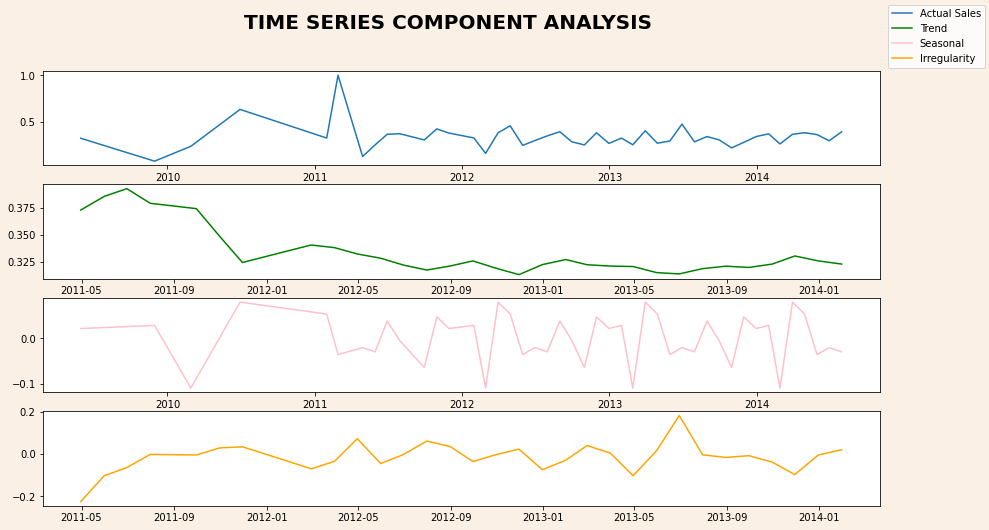

In [44]:
tsa_comp(monthly_uke)

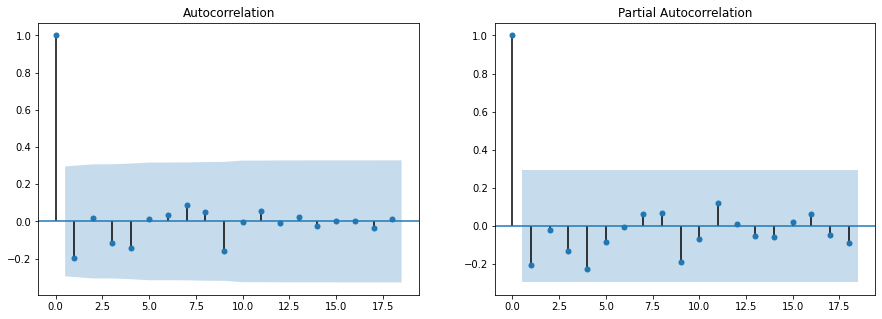

In [112]:
p_and_q(monthly_uke)

In [38]:
#checking stationarity of our data
stationary(music_data)

Its Stationary


In [58]:
len(monthly_uke)

44

In [59]:
train_len=int(0.7*len(monthly_uke))  
train_s=monthly_uke.iloc[:train_len]
test_s=monthly_uke.iloc[train_len:]
print("train: ",len(train_s),"test: ",len(test_s))

train:  30 test:  14


In [60]:
p=np.arange(2)
q=np.arange(2)
d=0
m_sarima=[]

list_sarima=[]
for p in range(3):
    for q in range(3):
        list_sarima.append((p,d,q))
        model=SARIMAX(train_s,order=(p,d,q),seasonal_order=(p,d,q,30)).fit()
        m_sarima.append(model)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequenc

In [61]:
aic = [] 
bic = []  
MSE = [] 
RMSE = [] 

for i in m_sarima:
    aic.append(i.aic) #appending aic
    bic.append(i.bic) #appending bic 
    forecast = i.fittedvalues #forecasting predictions
    mse = mean_squared_error(train_s, forecast) #calculating mse
    rmse= mean_squared_error(train_s, forecast,squared= False)#calculating rmse
    MSE.append(mse) #appending mse
    RMSE.append(rmse) #appending rmse

In [62]:
f= pd.DataFrame({'AIC':aic,'BIC':bic,'MSE':MSE,'RMSE':RMSE},index = list_sarima) 
f.sort_values(by=['RMSE'],ascending=True)

,AIC,BIC,MSE,RMSE
"(2, 0, 1)",-5.728315,4.080067,0.033620,0.183358
"(1, 0, 2)",-5.561550,4.246832,0.034070,0.184581
"(2, 0, 2)",-1.478770,11.132007,0.034105,0.184674
"(1, 0, 1)",-9.116437,-2.110450,0.034419,0.185525
"(2, 0, 0)",-2.940922,4.065065,0.040231,0.200575
"(1, 0, 0)",3.798526,8.002119,0.056337,0.237355
"(0, 0, 2)",14.300510,21.306497,0.068343,0.261426
"(0, 0, 1)",20.268688,24.472280,0.094208,0.306934
"(0, 0, 0)",28.286465,29.687663,0.140625,0.374999


In [71]:
monthly_uke.agg(['min', 'max'])

min    0.078075
max    1.000000
Name: polarity, dtype: float64

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check 

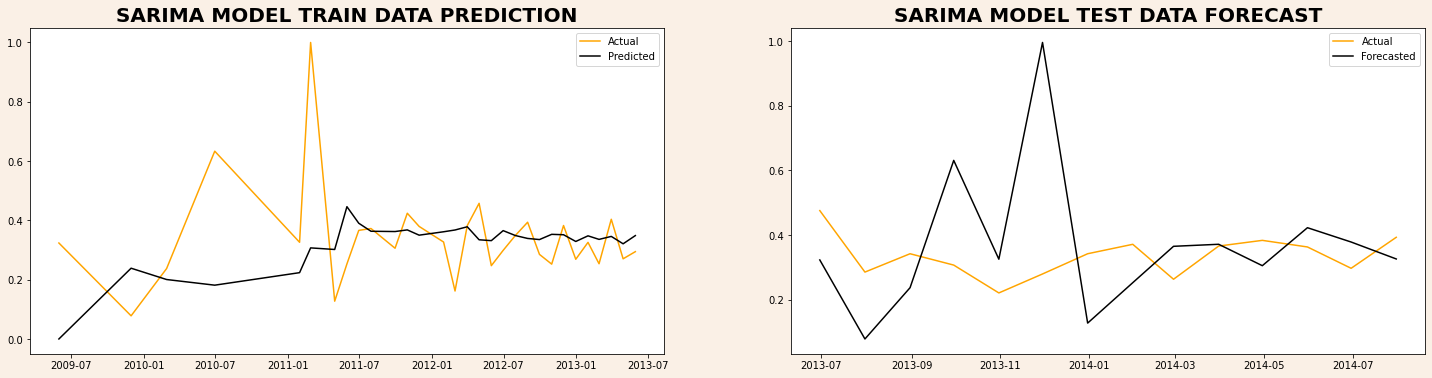

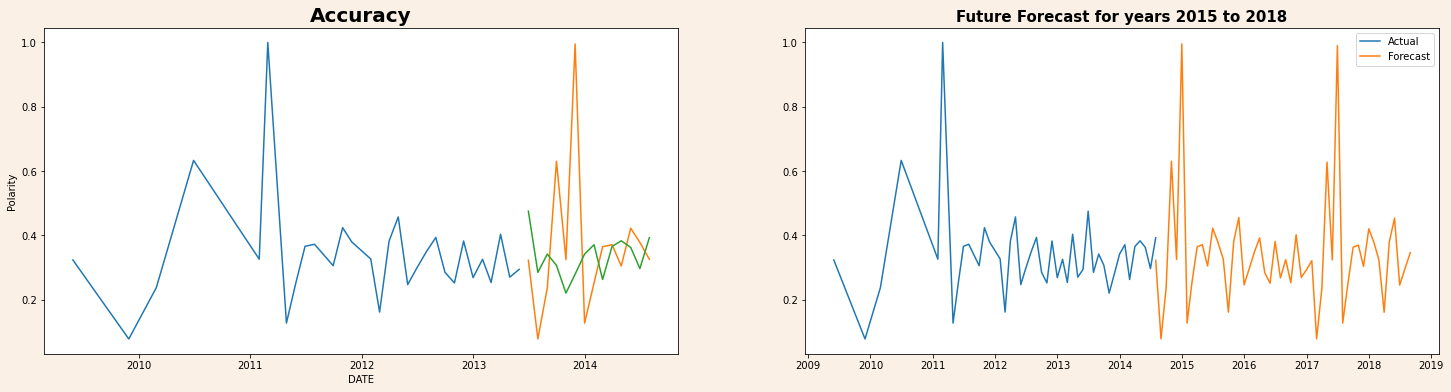

In [72]:
p=2
d=0
q=1

best_model_sarima_string=SARIMAX(train_s,order=(p,d,q),seasonal_order=(p,d,q,30)).fit()

#predicting past data values
sarima_pred= best_model_sarima_string.fittedvalues

# forecasting test data values
sarima_forecasts = best_model_sarima_string.forecast(len(test_s))
sarima_forecasts.index=test_s.index


future_dates=pd.read_csv("/content/drive/MyDrive/files/future_dates.csv",header=None,names=["date"])
future_dates.dtypes
future_dates=future_dates['date'].astype('datetime64[ns]')
future_dates

polarity = []
for i in range(1,51):
    x = random.uniform(-0.525,1.00)
    polarity.append(x)

future=pd.DataFrame()
future['future_polarity']=polarity
future.index=future_dates

sarima=best_model_sarima_string.forecast(len(future))
sarima.index=future.index


plt.subplots(figsize=(25,6), facecolor='linen')
plt.subplot(1, 2, 1)  # row 1, column 2, count 1
plt.title(f'SARIMA MODEL TRAIN DATA PREDICTION', fontweight='bold', size=20)
plt.plot(train_s, c='orange',label="Actual")
plt.plot(sarima_pred, c='black',label="Predicted")
plt.legend()


plt.subplot(1, 2, 2)  # row 1, column 2, count 1
plt.title(f'SARIMA MODEL TEST DATA FORECAST', fontweight='bold', size=20)
plt.plot(test_s, c='orange',label="Actual")
plt.plot(sarima_forecasts, c='black',label='Forecasted')
plt.legend()
plt.show()


plt.subplots(figsize=(25,6),facecolor ='linen')
plt.subplot(1, 2, 1)
plt.title(f'Accuracy', fontweight='bold', size=20)
plt.plot(train_s, label='Original Data')
plt.plot(sarima_forecasts, label='SARIMA Forecasts')
plt.plot(test_s, label='Actual Test Data')
plt.xlabel("DATE")
plt.ylabel('Polarity')


plt.subplot(1, 2, 2)
plt.title('Future Forecast for years 2015 to 2018', fontweight='bold',size=15)
plt.plot(monthly_uke, label = 'Actual')
plt.plot(sarima, label = 'Forecast')
plt.legend()
plt.show()

## **Interpretation - Musical Intruments:**

- In Stringed Instruments the product that has the highest positive reviews on average is Kala KA-15S Mahogany Soprano Ukulele.

- There are two significant peaks in polarity for the future years - one in 2014 and one in the year 2017.  

- In conclusion, the forecast for the years 2015 to 2018 imply that the customer sentiment towards this product **remain positive**.

# Home and Kitchen

In [91]:
hk_data=pd.read_csv("/content/drive/MyDrive/Final_House_and_Kitchen_EDA_Tableau.csv",parse_dates=['date'])

In [92]:
hk_data.shape

(2724693, 15)

In [93]:
hk_data.isnull().sum()

Unnamed: 0           0
asin                 0
title                0
description     369300
price                0
brand             7810
subcategory          0
reviewerID           0
review             796
ratings              0
summary           2440
date                 0
helpful_rate         0
polarity             0
sentiment            0
dtype: int64

In [94]:
hk_data.dropna(inplace=True)

In [95]:
hk_data.isnull().sum()

Unnamed: 0      0
asin            0
title           0
description     0
price           0
brand           0
subcategory     0
reviewerID      0
review          0
ratings         0
summary         0
date            0
helpful_rate    0
polarity        0
sentiment       0
dtype: int64

# Finding the most popular Subcategory in Home & Kitchen Dataset

In [96]:
values_hk=hk_data['subcategory'].value_counts()
values_hk

Kitchen & Dining                  1544500
Furniture                          174014
Storage & Organization             141470
Bedding                            136067
Bath                                88749
Heating, Cooling & Air Quality      87225
Vacuums & Floor Care                84744
Artwork                             46399
Home & Kitchen                      26105
Irons & Steamers                    15145
Kids' Home Store                      391
Accessories & Supplies                  2
Name: subcategory, dtype: int64

# Seperating top 10 subcategories (with >1k reviews)

In [97]:
b=values_hk[0:10]
c=b.index
new_data_hk=(hk_data[hk_data.subcategory.isin(c) == True])
new_data_hk
hk_data.reset_index(inplace=True)
hk_data['date']=hk_data['date'].astype('datetime64[ns]')

hk_data.reset_index(inplace=True)
hk_data=hk_data.set_index('date')
hk_data=hk_data.sort_index()

hk_df=new_data_hk.groupby('subcategory')['polarity'].mean()
hk_df.sort_values(ascending=False)

subcategory
Artwork                           0.343532
Bedding                           0.258705
Furniture                         0.253577
Kitchen & Dining                  0.253348
Home & Kitchen                    0.249063
Storage & Organization            0.247668
Bath                              0.239408
Irons & Steamers                  0.217692
Vacuums & Floor Care              0.217333
Heating, Cooling & Air Quality    0.187570
Name: polarity, dtype: float64

# Artwork is the most popular subcategory

In [98]:
hk_data['title'][hk_data['subcategory']=='Artwork'].value_counts()

Doctor Who - TV Show Poster (Van Gogh's Exploding Tardis) (Size: 36 x 24) Poster Print, 36x24                              495
Elegant Comfort&reg; 2-Piece SHEER PANEL with 2inch ROD POCKET - Window Curtains 60-inch width X 84-inch Length - White    350
Household Essentials 530 Dinnerware Storage Chest for Saucers, Tan, 7.5&quot; x 8&quot; x 8&quot;                          309
Gifts &amp; Decor Folk Art Porcelain Tear Drop Oil Warmer Candle Holder                                                    287
As Seen On TV Vertical Blind Repair Tabs 10 Pack                                                                           207
                                                                                                                          ... 
Gone in 60 Seconds                                                                                                           1
Frank Morrison Jump Off Art Print Poster                                                                       

# the product in artwork with the most reviews:
Doctor Who - TV Show Poster (Van Gogh's Exploding Tardis) (Size: 36 x 24) Poster Print, 36x24 is the product which is having good reviews all time

In [99]:
#seperating records associated with the most popular product 
hk=hk_data['polarity'][hk_data['title']=="Doctor Who - TV Show Poster (Van Gogh's Exploding Tardis) (Size: 36 x 24) Poster Print, 36x24"]

In [104]:
hk = pd.DataFrame(hk, columns=['polarity'])

In [105]:
hk=hk.resample("M").mean()
hk.dropna(inplace=True)

In [107]:
hk.head()

,polarity
date,
2011-05-31,0.500000
2011-06-30,0.666667
2011-07-31,0.104713
2011-08-31,0.538258
2011-09-30,0.454487


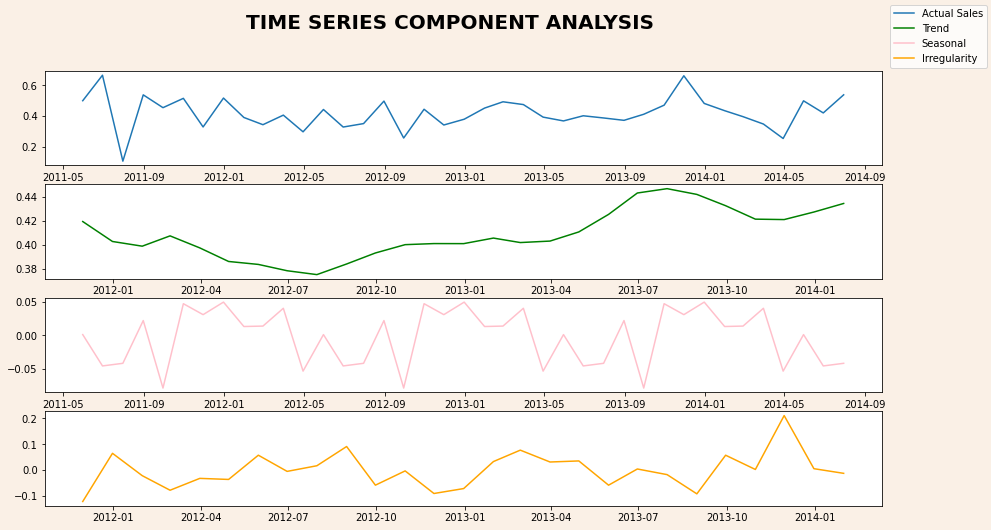

In [108]:
tsa_comp(hk)

In [109]:
stationary(hk)

Its Stationary


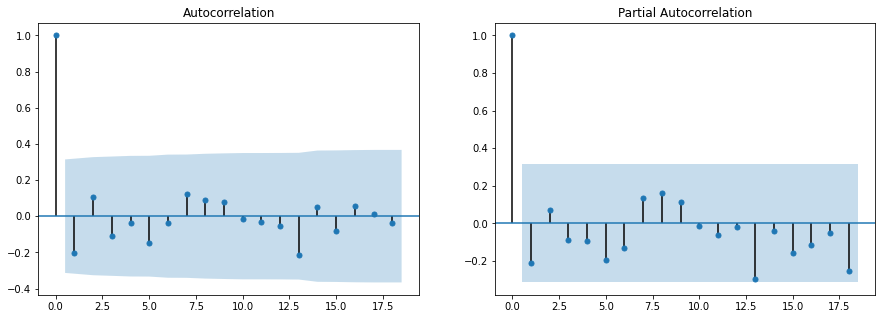

In [114]:
p_and_q(hk)

- p=3
- q=3
- d=0



In [115]:
train_len=int(0.7*len(hk))  
train_a=hk.iloc[:train_len]
test_a=hk.iloc[train_len:]
print("train: ",len(train_a),"test: ",len(test_a))


train:  27 test:  12


In [116]:
d=0
m_sarima_artwork=[]

list_sarima_artwork=[]
for p in range(4):
    for q in range(4):
        list_sarima_artwork.append((p,d,q))
        model=SARIMAX(train_a,order=(p,d,q),seasonal_order=(p,d,q,30)).fit()
        m_sarima_artwork.append(model)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/l

In [117]:
aic = [] 
bic = [] 
MSE = [] 
RMSE = [] 

for i in m_sarima_artwork:
    aic.append(i.aic) #appending aic
    bic.append(i.bic) #appending bic 
    forecast = i.fittedvalues #forecasting predictions
    mse = mean_squared_error(train_a, forecast) #calculating mse
    rmse= mean_squared_error(train_a, forecast,squared= False)#calculating rmse
    MSE.append(mse) #appending mse
    RMSE.append(rmse) #appending rmse

In [118]:
f= pd.DataFrame({'AIC':aic,'BIC':bic,'MSE':MSE,'RMSE':RMSE},index = list_sarima_artwork) 
f.sort_values(by=['RMSE'],ascending=True)

,AIC,BIC,MSE,RMSE
"(2, 0, 1)",-28.124615,-19.053757,0.022418,0.149726
"(2, 0, 2)",-23.636670,-11.974138,0.022426,0.149754
"(2, 0, 3)",-20.897162,-6.642956,0.022527,0.150089
"(3, 0, 3)",-16.933175,-0.087296,0.022558,0.150192
"(1, 0, 3)",-24.529571,-12.867040,0.022598,0.150326
"(1, 0, 2)",-28.201124,-19.130266,0.022737,0.150789
"(3, 0, 1)",-24.555561,-12.893029,0.022821,0.151066
"(3, 0, 2)",-20.514052,-6.259847,0.022890,0.151295
"(1, 0, 1)",-28.029917,-21.550732,0.023880,0.154533
"(3, 0, 0)",-23.967200,-14.896342,0.024179,0.155497


In [119]:
hk.agg(['min', 'max'])

,polarity
min,0.104713
max,0.666667


- For the better performace of p and q values 

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


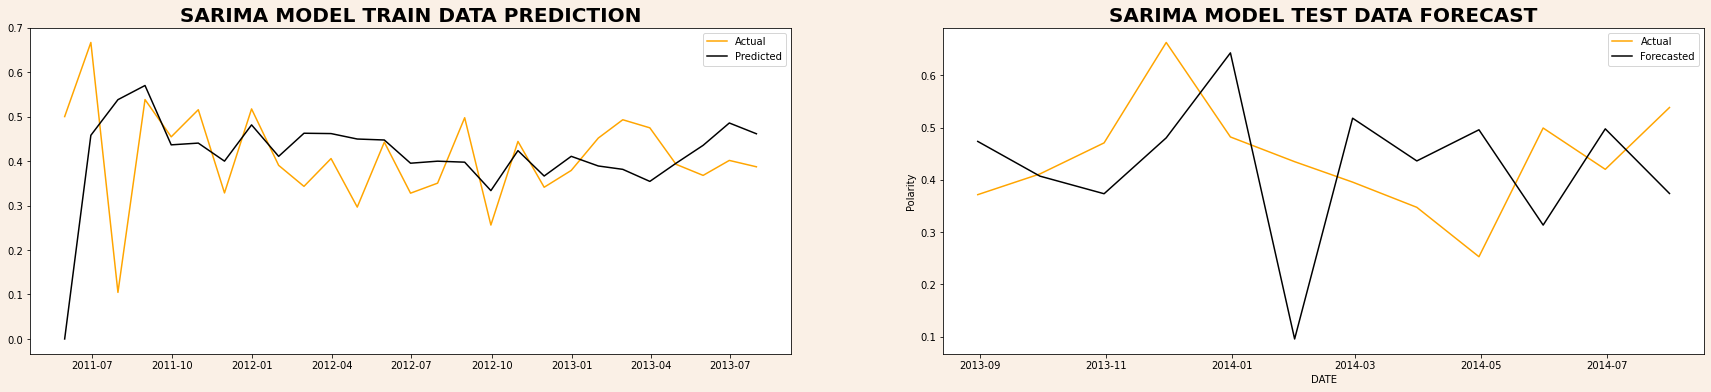

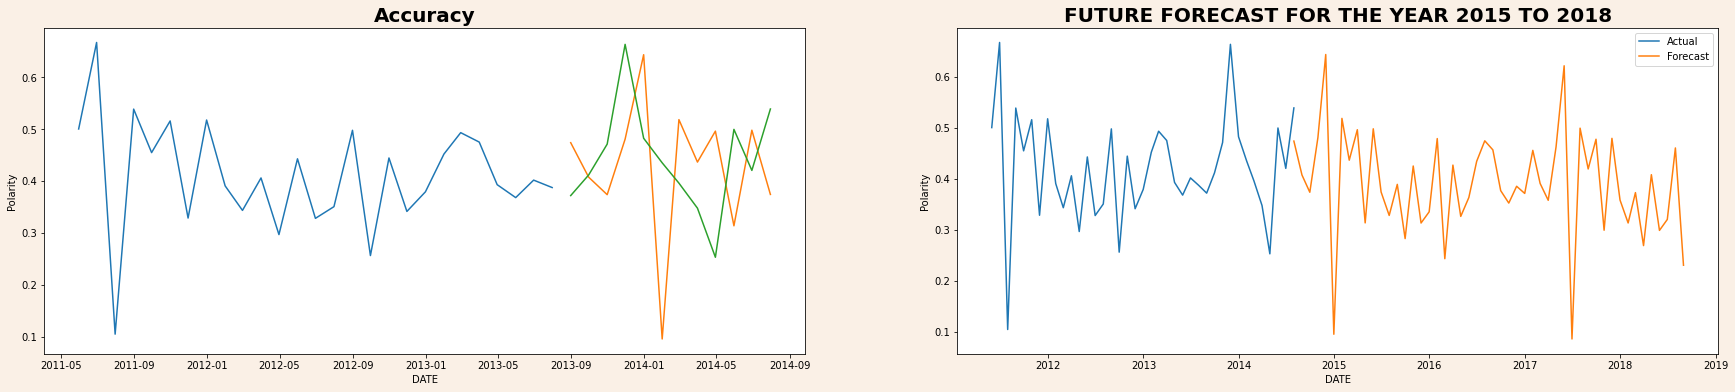

In [122]:
p=3
d=0
q=3


train_len=int(0.7*len(hk))  
train=hk.iloc[:train_len]
test=hk.iloc[train_len:]


best_model_sarima_artwork=SARIMAX(train,order=(p,d,q),seasonal_order=(p,d,q,30)).fit()


#predicting past data values
sarima_pred= best_model_sarima_artwork.fittedvalues


# forecasting test data values
sarima_forecasts = best_model_sarima_artwork.forecast(len(test))
sarima_forecasts.index=test.index


future_dates=pd.read_csv("/content/drive/MyDrive/files/future_dates.csv",header=None,names=["date"])
future_dates.dtypes
future_dates=future_dates['date'].astype('datetime64[ns]')
future_dates

polarity = []


for i in range(1,51):
    x = random.uniform(-0.25,1.0)
    polarity.append(x)

future=pd.DataFrame()
future['future_polarity']=polarity
future.index=future_dates


sarima=best_model_sarima_artwork.forecast(len(future))
sarima.index=future.index


plt.subplots(figsize=(30,6), facecolor='linen')
plt.subplot(1, 2, 1)  # row 1, column 2, count 1
plt.title(f'SARIMA MODEL TRAIN DATA PREDICTION', fontweight='bold', size=20)
plt.plot(train, c='orange',label="Actual")
plt.plot(sarima_pred, c='black',label="Predicted")
plt.legend()


plt.subplot(1, 2, 2)  # row 1, column 2, count 1
plt.title(f'SARIMA MODEL TEST DATA FORECAST', fontweight='bold', size=20)
plt.plot(test, c='orange',label="Actual")
plt.plot(sarima_forecasts, c='black',label='Forecasted')
plt.xlabel("DATE")
plt.ylabel('Polarity')
plt.legend()
plt.show()


plt.subplots(figsize=(30,6),facecolor ='linen')
plt.subplot(1, 2, 1)
plt.title(f'Accuracy', fontweight='bold', size=20)
plt.plot(train, label='Original Data')
plt.plot(sarima_forecasts, label='SARIMA Forecasts')
plt.plot(test, label='Actual Test Data')
plt.xlabel("DATE")
plt.ylabel('Polarity')


plt.subplot(1, 2, 2)
plt.title('FUTURE FORECAST FOR THE YEAR 2015 TO 2018',fontweight='bold', size=20)
plt.plot(hk, label = 'Actual')
plt.plot(sarima, label = 'Forecast')
plt.xlabel("DATE")
plt.ylabel('Polarity')
plt.legend()
plt.show()

## **Interpretation Home and Kitchen:**

- In artwork, Doctor Who - TV Show Poster (Van Gogh's Exploding Tardis) (Size: 36 x 24) Poster Print, 36x24 is the product which has the highest positive reviews on average. 

- There are two significant dips in polarity for the future years - one in 2015 and one in the year 2017. 

- The forecast denotes a slight downward trend in the future years. 

- In conclusion, the forecast for the years 2015 to 2018 imply that the customer sentiment towards this product **remain positive**.